In [3]:
import numpy as np
import tensorflow as tf

In [152]:
data = np.load('/Users/ian/Desktop/github/sc/adiabaticbinary/binary_97.0_128/Dse__w20.0_epoc14.0.npz')

In [153]:
names = data.files

In [154]:
for name in names:
    print(data[name].shape)


(784, 128)
(128,)
()
()
(128, 10)
(10,)
()
()


In [155]:
data['arr_5']

array([-0.17063658,  0.19248468,  0.16839805,  0.11447626, -0.05282755,
        0.23573042, -0.174008  ,  0.21087092, -0.30815193, -0.12391618],
      dtype=float32)

In [156]:
print(data['arr_6'])

0.37700823


In [157]:
print(data['arr_2'])

0.46767277


In [158]:

def get_real_weight(weight, kk):
    return np.tanh(weight*kk)

In [159]:
w = data['arr_4']
kk = data['arr_3']

In [160]:
kk

array(20., dtype=float32)

In [161]:
w

array([[-0.32951388,  0.08815125,  0.11290875, ...,  0.07753947,
        -0.02691649, -0.00991095],
       [-0.17104454,  0.08055642, -0.1957378 , ...,  0.03526232,
         0.03419834, -0.01537257],
       [-0.02785552,  0.07593115, -0.2028081 , ..., -0.01840519,
        -0.03230671,  0.12645617],
       ...,
       [ 0.20075454, -0.14261809,  0.13406491, ...,  0.06013748,
        -0.13033232,  0.13310504],
       [ 0.00309881, -0.04922911,  0.1291736 , ...,  0.15170076,
        -0.00693916, -0.16477661],
       [ 0.16979425, -0.25123602,  0.02535569, ..., -0.0787589 ,
         0.02908292, -0.0668071 ]], dtype=float32)

In [162]:
t = get_real_weight(w,kk) * data['arr_6']

In [163]:
t = get_real_weight(w,kk) * data['arr_6']

In [164]:
import matplotlib.pyplot as plt
def plot_weight_distribution(weights,title='Histogram of Weights Distribution'):
    # 绘制直方图
    weights = weights.reshape(-1)
    plt.hist(weights, bins=30, edgecolor='#2364a7')  # 根据权重范围和数量选择适当的bins数量
    plt.title(title)
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')

    # 显示图表
    plt.show()

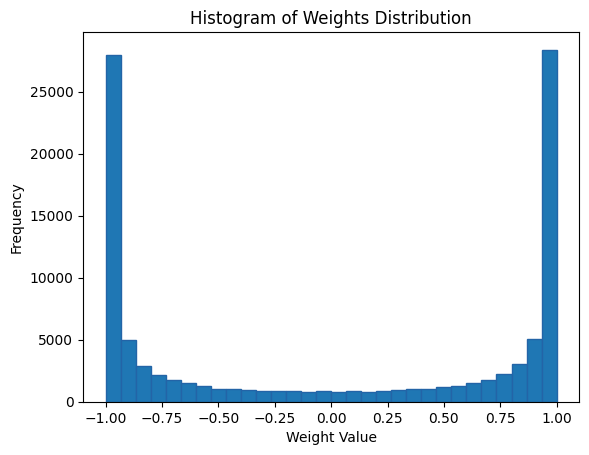

In [165]:
t = get_real_weight(np.concatenate([np.expand_dims(data['arr_1'],0),data['arr_0']]),kk)# * np.array(data['arr_2'])

plot_weight_distribution(t)

In [166]:
np.max(t)

1.0

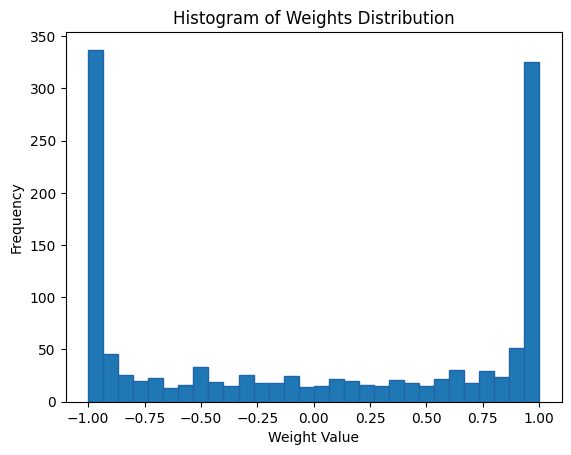

In [167]:
#第二层weight arr_6 nmk

kk = data['arr_3']
# t = get_real_weight(data['arr_0'],kk) * np.array(data['arr_2'])
t = get_real_weight(np.concatenate([np.expand_dims(data['arr_5'],0),data['arr_4']]),kk) 
plot_weight_distribution(t)


In [145]:
import tensorflow as tf
import numpy as np
import sys
import mnist

class DenseNet():
    def __init__(self, data):
        super(DenseNet, self).__init__()

        self.flat= tf.keras.layers.Flatten()

        self.dense1 = tf.keras.layers.Dense(128,use_bias=False)
        self.bias1 = tf.constant( data['arr_1'])
        # self.bias2 = tf.constant( data['arr_2'])
        self.nmk1 = tf.constant( data['arr_2'])
        self.nmk2 = tf.constant( data['arr_5'])
        self.dense2 = tf.keras.layers.Dense(10,use_bias=False)
        self.actv1=tf.keras.layers.Activation("relu")
        self.actv2=tf.keras.layers.Activation("softmax")
        self.drop=tf.keras.layers.Dropout(.2)
        
    @tf.autograph.experimental.do_not_convert
    def call(self, inputs, training=False, plot=False):
        x = self.dense1(self.flat(inputs))
        if plot: plot_weight_distribution(x.numpy())
        x = self.nmk1*x+self.bias1
        if plot: plot_weight_distribution(x.numpy())
        x = self.actv1(x)
        if plot: plot_weight_distribution(x.numpy())
        x = self.dense2(x)
        if plot: plot_weight_distribution(x.numpy())
        x = self.nmk2*x#+self.bias2
        if plot: plot_weight_distribution(x.numpy())
        x = self.actv2(x)
        if plot: plot_weight_distribution(x.numpy())
        return x

In [115]:
model.dense1.set_weights([get_real_weight(data['arr_0'],kk)])
model.dense2.set_weights([get_real_weight(data['arr_4'],kk)])

In [116]:
model.call(mnist.x_train[0:2])

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[6.9117986e-23, 3.4611402e-24, 4.8766192e-23, 5.6743558e-11,
        9.8131920e-09, 4.1512069e-01, 2.5820104e-24, 9.1328070e-07,
        4.7728200e-08, 5.8487833e-01],
       [1.5424679e-15, 2.6413929e-21, 1.0604505e-09, 9.1598482e-12,
        9.9982423e-01, 5.4791275e-05, 2.4028650e-06, 8.6332715e-05,
        3.2200023e-05, 6.6788362e-09]], dtype=float32)>

In [117]:
mnist.y_train[0:2]

<tf.Tensor: shape=(2,), dtype=uint8, numpy=array([9, 4], dtype=uint8)>

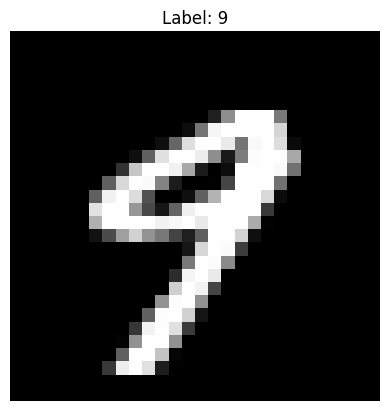

In [86]:
image = mnist.x_train[0]
label = mnist.y_train[0]
# Plot the image
plt.imshow(image, cmap='gray')
plt.title('Label: {}'.format(label))
plt.axis('off')  # Turn off axis
plt.show()

In [87]:
model.dense1.get_weights()

[array([[-0.02647593, -0.64746207,  0.5643725 , ..., -0.01573813,
          0.47837952,  0.5037331 ],
        [-0.19989426,  0.655248  ,  0.69268334, ..., -0.66907567,
          0.50748056, -0.400039  ],
        [-0.21886335,  0.03940047,  0.37006804, ..., -0.70975244,
         -0.22596142,  0.35117692],
        ...,
        [-0.25871655,  0.39182258, -0.73686945, ..., -0.55184156,
         -0.02316991, -0.5332909 ],
        [-0.2581158 ,  0.64148706, -0.32197434, ...,  0.652702  ,
          0.44218686,  0.66142195],
        [-0.75537926, -0.6540342 ,  0.74088657, ...,  0.06902623,
          0.4138605 ,  0.37291485]], dtype=float32)]

In [88]:
tf.experimental.numpy.experimental_enable_numpy_behavior()

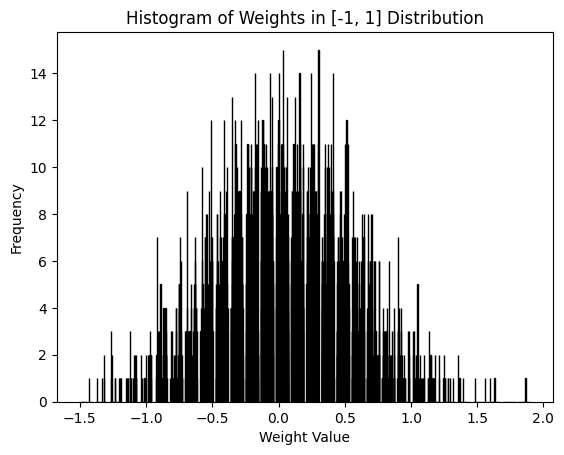

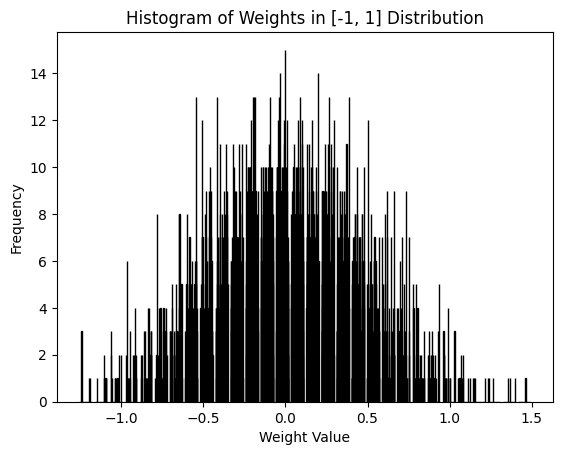

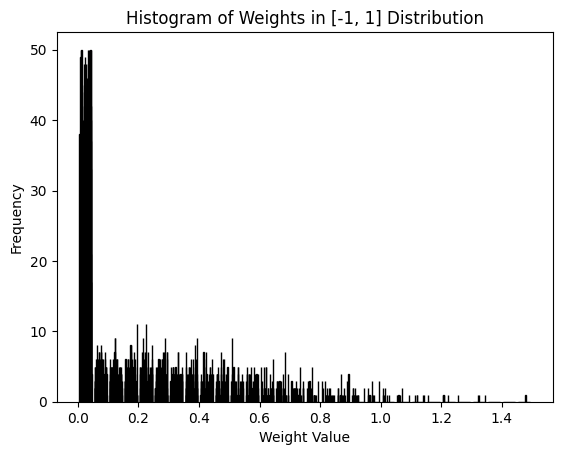

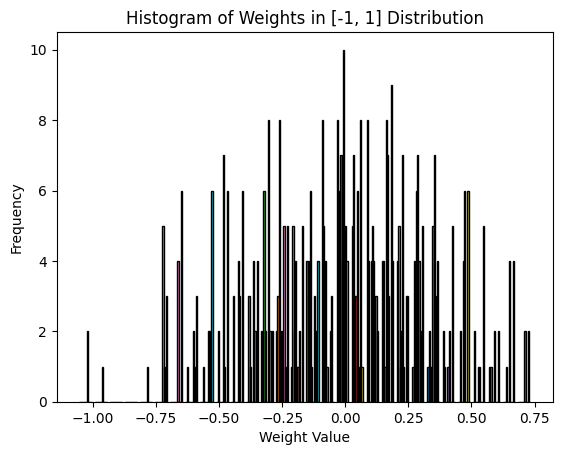

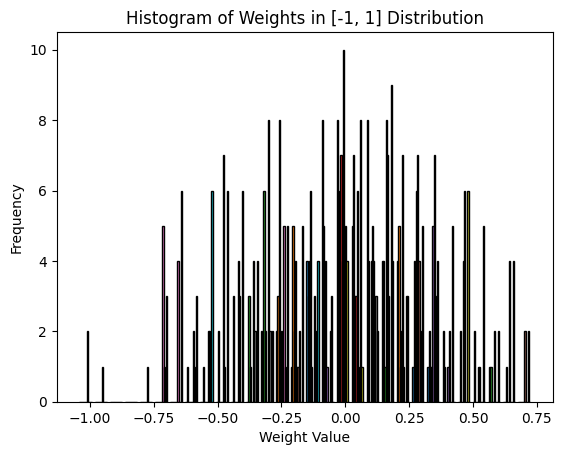

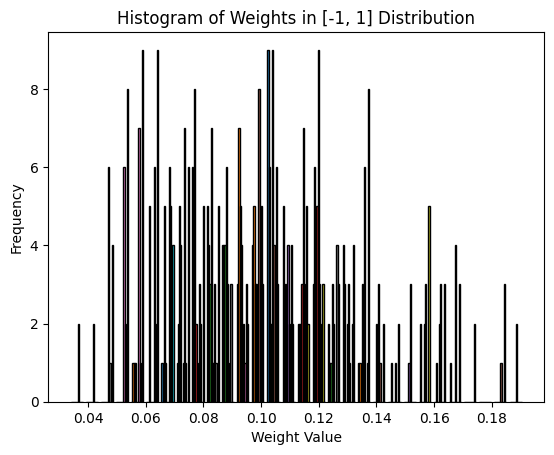

In [118]:
model=DenseNet(data)
y = model.call(mnist.x_train[:50],plot=True)



In [81]:
y.numpy()

array([[0.28130582, 0.30300426, 0.3902138 , 0.35567215, 0.26810697,
        0.31256765, 0.3557629 , 0.36177352, 0.28795472, 0.31849813],
       [0.29697022, 0.30035582, 0.34321776, 0.36831552, 0.30315185,
        0.30436388, 0.36995566, 0.43123567, 0.27839506, 0.3239084 ]],
      dtype=float32)

In [57]:

model.dense1.set_weights([get_real_weight(data['arr_0'],kk)])
model.dense2.set_weights([get_real_weight(data['arr_4'],kk)])

In [60]:
model(mnist.x_train[0:10])

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[  1.1513852 , -10.930976  ,  -5.1946955 ,  -1.0436713 ,
         -7.2081294 ,  17.00538   ,  10.360281  ,  -9.01712   ,
          6.1277084 ,  -0.4817277 ],
       [ -6.9026556 ,   1.1364439 ,  12.199529  ,  26.63675   ,
         -9.393384  ,  12.851878  , -19.118048  ,   1.2813039 ,
          3.3543975 ,   4.943018  ],
       [ -2.0846314 ,   0.87387025,   6.7980313 ,   8.854603  ,
         -4.134183  ,   6.8899984 ,   0.14130807,  -0.6222452 ,
         17.603195  ,   7.2171216 ],
       [ 26.241114  , -12.795531  ,  10.15631   ,  -2.1785042 ,
         -2.3642695 ,  -0.06760493,  -1.1695341 ,   9.149777  ,
         -6.2313795 ,   8.6432705 ],
       [ -3.5736227 ,   6.229531  ,  16.841276  ,  12.38192   ,
         -3.3832045 ,  -2.618793  ,  -5.020819  ,   2.5027373 ,
          4.8579373 ,  -5.2622676 ],
       [-11.215024  ,   6.678558  ,   4.3794074 ,   7.0727487 ,
         -2.6818578 ,  -4.700933  , -19.512083  ,  22.590738 

In [21]:
model.set_kk(100)

AttributeError: 'BinaryDense' object has no attribute 'kk'